In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from ast import literal_eval
import ast
from datetime import datetime
import time


from PIL import Image

import seaborn as sns

In [2]:
df = pd.read_csv(r'F:\Programacion\1.BOOTCAMP\data\the-movies-dataset\movies_metadata.csv')
df.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


In [3]:
def null_count (df):
    """
                        ---What it does---
    Identifies and counts the number of null values in any given df. Does not return anything.

                        ---What it needs---
    A DataFrame
    """
    null_in_df = df.isnull().any()
    is_null = df.isnull().sum()
    print (f'Presence of null in clolumns:\n{null_in_df}\n\nNumber of null in columns:\n{is_null}')

In [4]:
null_count(df)

Presence of null in clolumns:
adult                    False
belongs_to_collection     True
budget                   False
genres                   False
homepage                  True
id                       False
imdb_id                   True
original_language         True
original_title           False
overview                  True
popularity                True
poster_path               True
production_companies      True
production_countries      True
release_date              True
revenue                   True
runtime                   True
spoken_languages          True
status                    True
tagline                   True
title                     True
video                     True
vote_average              True
vote_count                True
dtype: bool

Number of null in columns:
adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0


# Profit

In [5]:
profit = df[['id', 'budget', 'revenue']]

In [6]:
profit.budget.value_counts()

0            36573
5000000        286
10000000       259
20000000       243
2000000        242
             ...  
224056           1
237000000        1
16700000         1
12003848         1
4638783          1
Name: budget, Length: 1226, dtype: int64

In [7]:
profit.revenue.value_counts()

0.0            38052
12000000.0        20
10000000.0        19
11000000.0        19
2000000.0         18
               ...  
245724603.0        1
12212123.0         1
8203235.0          1
25900.0            1
12032983.0         1
Name: revenue, Length: 6863, dtype: int64

In [8]:
profit[pd.to_numeric(profit['budget'],errors='coerce').isnull()]['budget']

19730    /ff9qCepilowshEtG2GYWwzt2bs4.jpg
29503    /zV8bHuSL6WXoD6FWogP9j4x80bL.jpg
35587    /zaSf5OG7V8X8gqFvly88zDdRm46.jpg
Name: budget, dtype: object

In [9]:
a = profit.iloc[29503, 1:4]
b = profit.iloc[19730 , 1:4]
c = profit.iloc[35587 , 1:4]

a, b, c

(budget     /zV8bHuSL6WXoD6FWogP9j4x80bL.jpg
 revenue                                 NaN
 Name: 29503, dtype: object, budget     /ff9qCepilowshEtG2GYWwzt2bs4.jpg
 revenue                                 NaN
 Name: 19730, dtype: object, budget     /zaSf5OG7V8X8gqFvly88zDdRm46.jpg
 revenue                                 NaN
 Name: 35587, dtype: object)

In [10]:
profit = profit.drop(19730)
profit = profit.drop(29503) 
profit = profit.drop(35587)
print ("j.peg columns dropped")

j.peg columns dropped


In [11]:
profit.head()

,id,budget,revenue
0,862,30000000,373554033.0
1,8844,65000000,262797249.0
2,15602,0,0.0
3,31357,16000000,81452156.0
4,11862,0,76578911.0


In [12]:
 profit.budget.dtype

dtype('O')

In [13]:
profit.budget = pd.to_numeric(profit.budget, errors='coerce')
profit.budget.dtype

dtype('int64')

In [14]:
profit['budget'] = profit['budget'].replace(0, np.nan)
profit['revenue'] = profit['revenue'].replace(0, np.nan)

profit

,id,budget,revenue
0,862,30000000.0,373554033.0
1,8844,65000000.0,262797249.0
2,15602,NaN,NaN
3,31357,16000000.0,81452156.0
4,11862,NaN,76578911.0
...,...,...,...
45461,439050,NaN,NaN
45462,111109,NaN,NaN
45463,67758,NaN,NaN
45464,227506,NaN,NaN


In [15]:
profit['profit'] = profit['revenue'] - profit['budget']
profit = profit.dropna()

profit

,id,budget,revenue,profit
0,862,30000000.0,373554033.0,343554033.0
1,8844,65000000.0,262797249.0,197797249.0
3,31357,16000000.0,81452156.0,65452156.0
5,949,60000000.0,187436818.0,127436818.0
8,9091,35000000.0,64350171.0,29350171.0
...,...,...,...,...
45250,24049,12000000.0,19000000.0,7000000.0
45399,280422,750000.0,3.0,-749997.0
45409,62757,800000.0,1328612.0,528612.0
45412,63281,2000000.0,1268793.0,-731207.0


In [16]:
# a4_dims = (20, 10)
# fig, ax = plt.subplots(figsize=a4_dims)
# ax = sns.scatterplot(x = "id", y = "profit", data = profit, alpha = 0.75, size = 'profit')

# Popularity

In [17]:
df.popularity.dtype

dtype('O')

In [18]:
popularity_df = df[['id', 'popularity']]
# popularity_df = popularity_df.set_index('id')
popularity_df.head(1)

,id,popularity
0,862,21.9469


In [19]:
prob_rows = popularity_df[pd.to_numeric(popularity_df['popularity'],errors='raise').isnull()]['popularity']
prob_rows

ValueError: Unable to parse string "Beware Of Frost Bites" at position 35587

In [20]:
popularity_df = popularity_df.dropna()

In [21]:
popularity_df = popularity_df.drop(35587)

In [22]:
popularity_df.isnull().any(), popularity_df.popularity.dtype


(id            False
 popularity    False
 dtype: bool, dtype('O'))

In [23]:
popularity_df['popularity'] = pd.to_numeric(popularity_df['popularity'], errors='coerce')
popularity_df['popularity'].dtype

dtype('float64')

In [24]:
data = popularity_df.popularity.describe()
data

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

# Genres

In [25]:
genres = pd.DataFrame(df[['id', 'genres']])
genres['genres'] = genres['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [26]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 2 columns):
id        45466 non-null object
genres    45466 non-null object
dtypes: object(2)
memory usage: 710.5+ KB


In [27]:
genres['genres'].value_counts()

[Drama]                                                                           5000
[Comedy]                                                                          3621
[Documentary]                                                                     2723
[]                                                                                2442
[Drama, Romance]                                                                  1301
                                                                                  ... 
[Drama, Thriller, Documentary]                                                       1
[Crime, Action, Horror, Thriller]                                                    1
[Action, Comedy, Thriller, Documentary]                                              1
[Drama, Horror, Family]                                                              1
[Fantasy, Animation, Drama, Science Fiction, Romance, Foreign, Family, Comedy]       1
Name: genres, Length: 4069, dtype: int64

In [28]:
for e in range(45466):
    genres['genres'][e]= ', '.join(genres['genres'][e])

genres['genres'].head()

0     Animation, Comedy, Family
1    Adventure, Fantasy, Family
2               Romance, Comedy
3        Comedy, Drama, Romance
4                        Comedy
Name: genres, dtype: object

In [ ]:
genres = genres.replace('', np.NaN).dropna(how='all')

In [31]:
genres.head()

,id,genres
0,862,"Animation, Comedy, Family"
1,8844,"Adventure, Fantasy, Family"
2,15602,"Romance, Comedy"
3,31357,"Comedy, Drama, Romance"
4,11862,Comedy


In [32]:
genres_count = genres.genres.value_counts().head(10)
genres_count

Drama                     5000
Comedy                    3621
Documentary               2723
Drama, Romance            1301
Comedy, Drama             1135
Horror                     974
Comedy, Romance            930
Comedy, Drama, Romance     593
Drama, Comedy              532
Horror, Thriller           528
Name: genres, dtype: int64

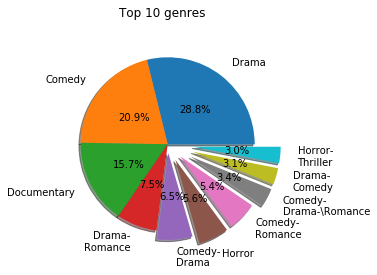

In [33]:
labels = 'Drama', 'Comedy', 'Documentary', 'Drama-\nRomance', 'Comedy-\nDrama', 'Horror', 'Comedy-\nRomance', 'Comedy-\nDrama-\Romance', 'Drama-\nComedy', 'Horror-\nThriller', 
explode = (0, 0, 0, 0, 0.1, 0.2, 0.2, 0.3, 0.3, 0.3)
plt.pie(genres_count,  autopct='%1.1f%%', startangle=0, labels= labels, explode = explode, shadow= True, pctdistance = 0.5, labeldistance = 1.2)
plt.suptitle('Top 10 genres', fontsize=12)

plt.show();

The Top 10 most popular types of films seems to contain elements of Drama and Comedy. It seems however that the data was not uniformaly registered, as it can be observed the appearence of both "Comedy-Drama" and "Drama-Comedy". This could be considered an error, however it should be taken into account that, given the subject matter, it may refer to the predominance of one element over the other. E g. a Comedy-Drama could be more focused on Comedy, while a Drama-Comedy is concieved as a Drama first and a Comedy second.

In [34]:
def genre_counter (df_col):
    """
                        ---What it does---
    Counts the number of times the film genres appears in the df, combinations will not be counted.
                        
                        ---What it needs---
    A df column to scan. The column MUST contain strings, otherwise it will not count anything.
                        
                        ---What it returns---
    A new df called genre_counts composed of both the genres searched and the times they appear.
    """
    # List of film genres from amc fimsite. Fantasy genre added to main film genres by author of DAANMO project
    action = 0
    adventure = 0
    comedy = 0
    crime = 0
    drama = 0
    documentary = 0
    fantasy = 0
    historical = 0
    horror = 0
    musicals = 0
    romance = 0
    scifi = 0
    war = 0
    western = 0

    # Counter
    for i in df_col:
        if i == 'Action':
            action += 1
        elif i == 'Adventure':
            adventure += 1
        elif i == 'Comedy':
            comedy += 1
        elif i == 'Crime':
            crime += 1
        elif i == 'Drama':
            drama += 1
        elif i == 'Documentary':
            documentary += 1
        elif i == 'Fantasy':
            fantasy += 1
        elif i == 'Historical':
            historical += 1
        elif i == 'Horror':
            horror += 1
        elif i == 'Musical':
            musical += 1
        elif i == 'Science Fiction':
            scifi += 1
        elif i == 'War':
            war += 1
        elif i == 'Western':
            western += 1

    #df to return
    genre_counts = pd.DataFrame({'Genres': ['Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Documentary', 'Fantasy', 'Historical', 'Horror', 'Musical', 'Romance', 'Science Fiction', 'War', 'Western'], 'Counts': [action, adventure, comedy, crime, drama, documentary, fantasy, historical, horror, musicals, romance, scifi, war, western]})
    return genre_counts

In [35]:
genres.shape

(45466, 2)

In [36]:
genre_count = genre_counter(df_col = genres['genres'])
genre_count = genre_count.sort_values(by= 'Counts', ascending= False).reset_index(drop= True)
genre_count

,Genres,Counts
0,Drama,5000
1,Comedy,3621
2,Documentary,2723
3,Horror,974
4,Western,318
5,Action,278
6,Science Fiction,198
7,Crime,134
8,Adventure,110
9,Fantasy,51


In [37]:
genre_count2 = genre_count.loc[genre_count.Counts > 0]

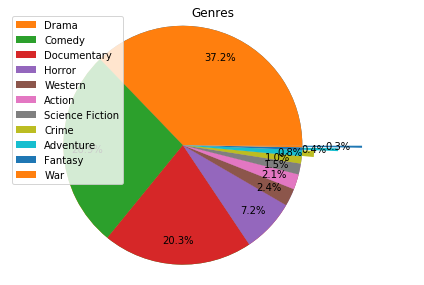

In [38]:
labels = genre_count2.Genres 
explode=(0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.3, 0.5)
plt.pie(genre_count2.Counts, autopct='%1.1f%%',  explode =  explode, pctdistance = 0.8)
patches, texts = plt.pie(genre_count2.Counts)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.suptitle('Genres', fontsize=12)

plt.show();

# Production countries

In [39]:
df.production_countries

0        [{'iso_3166_1': 'US', 'name': 'United States o...
1        [{'iso_3166_1': 'US', 'name': 'United States o...
2        [{'iso_3166_1': 'US', 'name': 'United States o...
3        [{'iso_3166_1': 'US', 'name': 'United States o...
4        [{'iso_3166_1': 'US', 'name': 'United States o...
                               ...                        
45461               [{'iso_3166_1': 'IR', 'name': 'Iran'}]
45462        [{'iso_3166_1': 'PH', 'name': 'Philippines'}]
45463    [{'iso_3166_1': 'US', 'name': 'United States o...
45464             [{'iso_3166_1': 'RU', 'name': 'Russia'}]
45465     [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]
Name: production_countries, Length: 45466, dtype: object

In [40]:
countries = df [['id', 'production_countries', 'original_language']]
countries['production_countries'] = countries['production_countries'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
countries = pd.DataFrame(countries.dropna())

countries.head()

,id,production_countries,original_language
0,862,[United States of America],en
1,8844,[United States of America],en
2,15602,[United States of America],en
3,31357,[United States of America],en
4,11862,[United States of America],en


In [41]:
productions = countries['production_countries'].value_counts().head(11)
productions

[United States of America]                    17848
[]                                             6286
[United Kingdom]                               2238
[France]                                       1652
[Japan]                                        1356
[Italy]                                        1030
[Canada]                                        840
[Germany]                                       749
[India]                                         735
[Russia]                                        735
[United Kingdom, United States of America]      569
Name: production_countries, dtype: int64

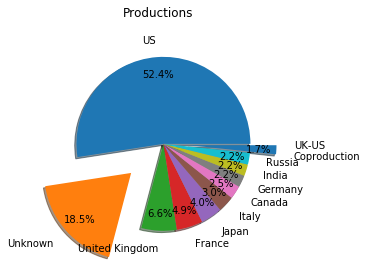

In [42]:
labels = 'US', 'Unknown', 'United Kingdom', 'France', 'Japan', 'Italy', 'Canada', 'Germany', 'India', 'Russia', 'UK-US\nCoproduction'
explode = 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0.3
plt.pie(productions, autopct='%1.1f%%', startangle=0, labels= labels, explode = explode, shadow= True, pctdistance = 0.8, labeldistance = 1.2)
plt.suptitle('Productions', fontsize=12)

plt.show();

While 1/5th of the data is non-readable (no value is assigned to it), it is has become quite clear the predominance and importance of the american film industry. Indeed if we take a quick look at the pie, we can see how even accounting for the missing data, no other country comes even close to the US in this matter.

In [43]:
languages = pd.DataFrame(countries['original_language'].value_counts())
languages_10 = languages.head(10)
languages_10

,original_language
en,32269
fr,2438
it,1529
ja,1350
de,1080
es,994
ru,826
hi,508
ko,444
zh,409


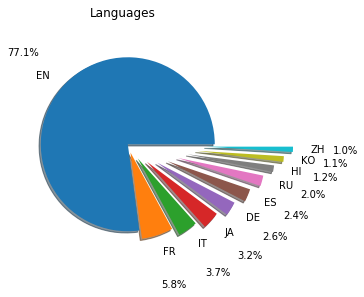

In [44]:
explode = (0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9)
labels = 'EN', 'FR', 'IT', 'JA', 'DE', 'ES', 'RU', 'HI', 'KO', 'ZH'
plt.pie(languages_10,  autopct='%1.1f%%', startangle=0, labels= labels, explode = explode, shadow= True, pctdistance = 1.6, labeldistance = 1.2)
plt.suptitle('Languages', fontsize=12)

plt.show();


As the language chart corroborates, the english speaking market is by far the most numerous. Also some of the position for the countries/languages has shifted a bit (most notably the smaller film industries), and the spanish speaking market makes a sudden appearance ahead of the russian or hindu markets

# Profit by genre

In [45]:
profit_genre = pd.merge(profit, genres, on='id', how='inner')

In [46]:
profit_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5393 entries, 0 to 5392
Data columns (total 5 columns):
id         5393 non-null object
budget     5393 non-null float64
revenue    5393 non-null float64
profit     5393 non-null float64
genres     5381 non-null object
dtypes: float64(3), object(2)
memory usage: 252.8+ KB


In [47]:
profit_genre.columns = ['Id', 'Budget', 'Revenue', 'Profit', 'Genre']
profit_genre.head()

,Id,Budget,Revenue,Profit,Genre
0,862,30000000.0,373554033.0,343554033.0,"Animation, Comedy, Family"
1,8844,65000000.0,262797249.0,197797249.0,"Adventure, Fantasy, Family"
2,31357,16000000.0,81452156.0,65452156.0,"Comedy, Drama, Romance"
3,949,60000000.0,187436818.0,127436818.0,"Action, Crime, Drama, Thriller"
4,9091,35000000.0,64350171.0,29350171.0,"Action, Adventure, Thriller"


In [48]:
profit_gen = profit_genre.groupby('Genre').Profit.sum().sort_values(ascending = False).head(10)
profit_gen

Genre
Comedy                                1.371178e+10
Drama                                 1.054541e+10
Comedy, Romance                       8.190228e+09
Action, Adventure, Science Fiction    6.786456e+09
Adventure, Action, Science Fiction    6.296443e+09
Animation, Family                     6.010682e+09
Adventure, Fantasy, Action            5.909116e+09
Action, Adventure, Fantasy            5.288729e+09
Comedy, Drama, Romance                4.815120e+09
Adventure, Fantasy, Family            4.799516e+09
Name: Profit, dtype: float64

In [49]:
profit_gen2 = pd.DataFrame(profit_gen.loc[profit_gen > 10000])
profit_gen2.head(1)

,Profit
Genre,
Comedy,1.371178e+10


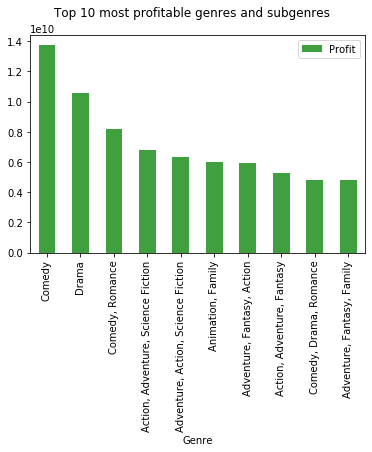

In [50]:
profit_gen2.plot(kind='bar', color = 'green', alpha = 0.75)
plt.suptitle('Top 10 most profitable genres and subgenres', fontsize=12);

# Realease Dates and runtime

In [51]:
dates = pd.DataFrame(df[['id', 'release_date', 'runtime']])
dates = dates.set_index('id')
dates.head()

,release_date,runtime
id,,
862,1995-10-30,81.0
8844,1995-12-15,104.0
15602,1995-12-22,101.0
31357,1995-12-22,127.0
11862,1995-02-10,106.0


In [52]:
dates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45466 entries, 862 to 461257
Data columns (total 2 columns):
release_date    45379 non-null object
runtime         45203 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.0+ MB


In [89]:
sample = dates.release_date.iloc[2]
sample

'1995-12-22'

In [90]:
sample = datetime.strptime(sample, '%Y-%m-%d')
sample

datetime.datetime(1995, 12, 22, 0, 0)

In [91]:
date_fix = lambda x: datetime.strptime(sample, '%Y-%m-%d')

In [94]:
dates.release_date.dtype

dtype('O')

In [92]:
dates['release_date'].apply(date_fix)

TypeError: strptime() argument 1 must be str, not datetime.datetime